In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import ramanpy as rpy
spectra2 = rpy.Spectra()
to_predict = rpy.readFile("measurements/Ramandata_tablets.MAT", spectra2, True)
spectra2_copy = spectra2.copy()

+----------------+------+----------+----------+----------+-----+----------+----------+----------+----------+----------+
| active (% w/w) | Type | 3600.000 | 3599.000 | 3598.000 | ... | 204.0000 | 203.0000 | 202.0000 | 201.0000 | 200.0000 |
+----------------+------+----------+----------+----------+-----+----------+----------+----------+----------+----------+
+----------------+------+----------+----------+----------+-----+----------+----------+----------+----------+----------+
Beginning of importing frequency: 3600.000
End of importing frequency: 200.0000
Name of column containing the to-predict values: active (% w/w)


In [2]:
%timeit spectra2.at[0, "intensity"] = 1

7.78 µs ± 1.21 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [3]:
%timeit spectra2.loc[0, "intensity"] = 1

148 µs ± 9.08 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%timeit spectra2.smoothSignal(index=2)

2.44 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


--- 15.903252840042114 seconds ---


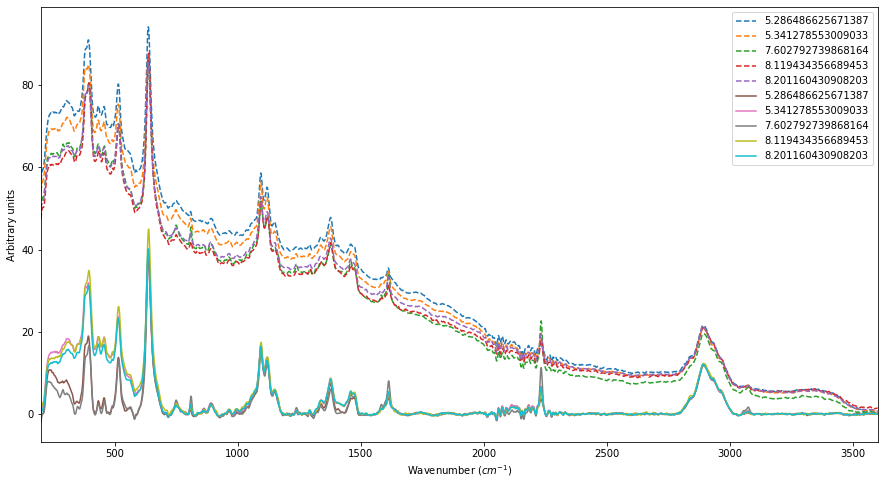

In [175]:
import time
spectra2 = spectra2_copy.copy()
plt.figure(figsize=(15,8))
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[0, "intensity"], "--", label=to_predict[0])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[15, "intensity"], "--", label=to_predict[15])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[55, "intensity"], "--", label=to_predict[55])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[65, "intensity"], "--", label=to_predict[65])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[90, "intensity"], "--", label=to_predict[90])
axes = plt.gca()
axes.set_xlim([200,3601])
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Arbitrary units")

# Pre-processing
start_time = time.time()
ROI = np.array([[200, 300], [700, 1000], [1600, 2000], [2250, 2700], [3100, 3600]])
spectra2.removeBaseline(roi=ROI, method="drPLS", inPlace=True, **{"ratio": 1e-4, "niter": 1000})
print("--- %s seconds ---" % (time.time() - start_time))
spectra2.smoothSignal()

plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[0, "intensity"], label=to_predict[0])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[15, "intensity"], label=to_predict[15])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[55, "intensity"], label=to_predict[55])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[65, "intensity"], label=to_predict[65])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[90, "intensity"], label=to_predict[90])
plt.legend()
plt.show()

CV metrics: 
RMSECV = 0.38 
R2 = 0.89

Test metrics: 
RMSEP = 0.43 
R2 = 0.78


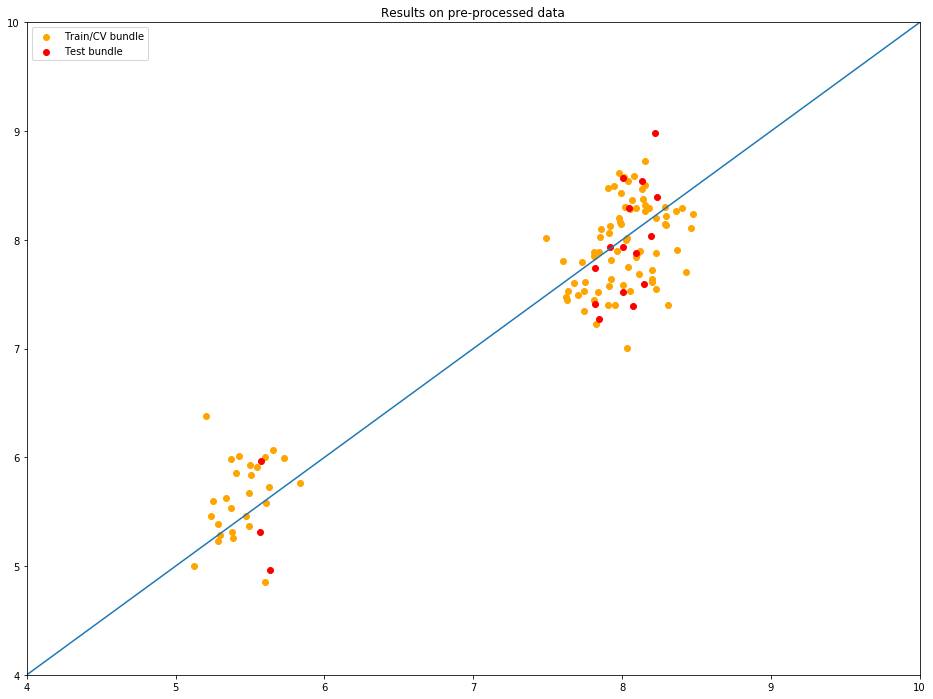

In [176]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import math
# Train best model
spectra2.loadModel("models/16-04-2020-0929.pkl")
results = spectra2.trainModel(to_predict)
print(f"CV metrics: \nRMSECV = {round(math.sqrt(abs(mean_squared_error(results['Y_train'], results['Y_train_pred']))), 2)} \nR2 = {round(r2_score(results['Y_train'], results['Y_train_pred']), 2)}\n")
print(f"Test metrics: \nRMSEP = {round(math.sqrt(abs(mean_squared_error(results['Y_test'], results['Y_test_pred']))), 2)} \nR2 = {round(r2_score(results['Y_test'], results['Y_test_pred']), 2)}")
ax = plt.figure(figsize=(16,12))
plt.scatter(results["Y_train"], results["Y_train_pred"], color="orange", label="Train/CV bundle")
plt.scatter(results["Y_test"], results["Y_test_pred"], color="red", label="Test bundle")
plt.plot(np.arange(4.0, 10.1, 0.1),np.arange(4.0, 10.1, 0.1))
axes = plt.gca()
axes.set_xlim([4,10])
axes.set_ylim([4,10])
plt.legend()
plt.title("Results on pre-processed data")
plt.show()

--- 75.68424105644226 seconds ---


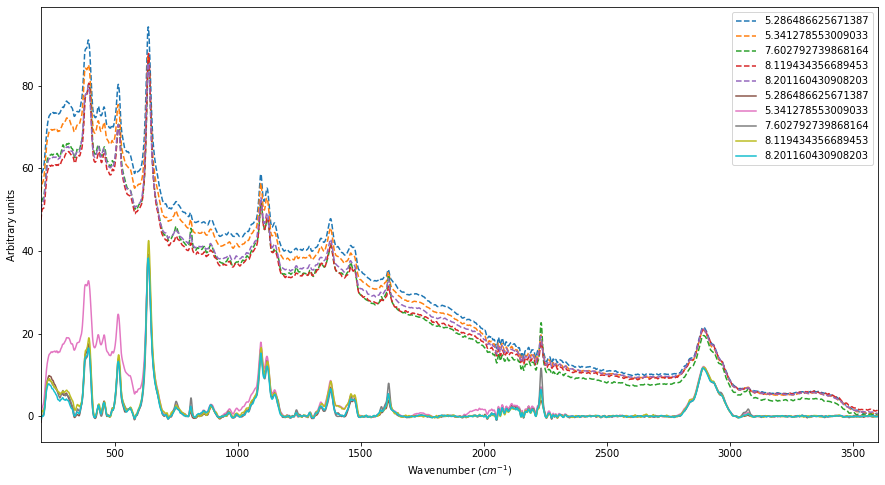

In [168]:
spectra2 = spectra2_copy.copy()
plt.figure(figsize=(15,8))
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[0, "intensity"], "--", label=to_predict[0])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[15, "intensity"], "--", label=to_predict[15])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[55, "intensity"], "--", label=to_predict[55])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[65, "intensity"], "--", label=to_predict[65])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[90, "intensity"], "--", label=to_predict[90])
axes = plt.gca()
axes.set_xlim([200,3601])
plt.xlabel("Wavenumber ($cm^{-1}$)")
plt.ylabel("Arbitrary units")

# Pre-processing
start_time = time.time()
ROI = np.array([[200, 300], [700, 1000], [1600, 2000], [2250, 2700], [3100, 3600]])
spectra2.removeBaseline(roi=ROI, method="arPLS", inPlace=True, **{"ratio":1e-3})
print("--- %s seconds ---" % (time.time() - start_time))
spectra2.smoothSignal()

plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[0, "intensity"], label=to_predict[0])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[15, "intensity"], label=to_predict[15])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[55, "intensity"], label=to_predict[55])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[65, "intensity"], label=to_predict[65])
plt.plot(spectra2.loc[0, "wavenumbers"], spectra2.loc[90, "intensity"], label=to_predict[90])
plt.legend()
plt.show()

CV metrics: 
RMSECV = 0.47 
R2 = 0.84

Test metrics: 
RMSEP = 0.5 
R2 = 0.7


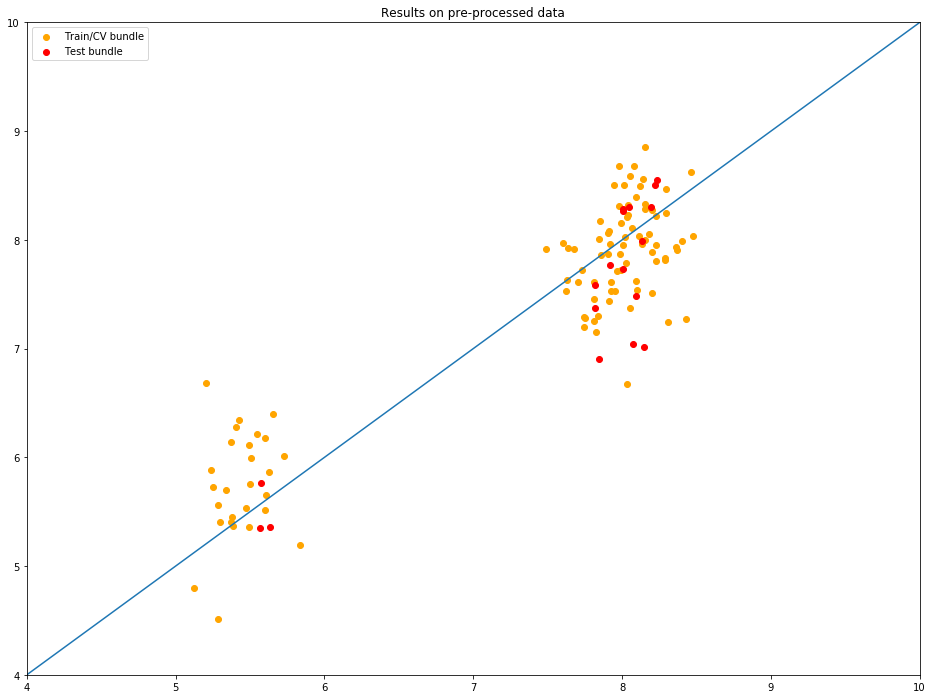

In [169]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import math
# Train best model
spectra2.loadModel("models/16-04-2020-0929.pkl")
results = spectra2.trainModel(to_predict)
print(f"CV metrics: \nRMSECV = {round(math.sqrt(abs(mean_squared_error(results['Y_train'], results['Y_train_pred']))), 2)} \nR2 = {round(r2_score(results['Y_train'], results['Y_train_pred']), 2)}\n")
print(f"Test metrics: \nRMSEP = {round(math.sqrt(abs(mean_squared_error(results['Y_test'], results['Y_test_pred']))), 2)} \nR2 = {round(r2_score(results['Y_test'], results['Y_test_pred']), 2)}")
ax = plt.figure(figsize=(16,12))
plt.scatter(results["Y_train"], results["Y_train_pred"], color="orange", label="Train/CV bundle")
plt.scatter(results["Y_test"], results["Y_test_pred"], color="red", label="Test bundle")
plt.plot(np.arange(4.0, 10.1, 0.1),np.arange(4.0, 10.1, 0.1))
axes = plt.gca()
axes.set_xlim([4,10])
axes.set_ylim([4,10])
plt.legend()
plt.title("Results on pre-processed data")
plt.show()

In [177]:
# Test all regressors to obtain best one
spectra2.testRegressors(to_predict)

Performing normalization...
Performing dimensionality reduction...
Creating regressors...
Testing regressors...
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.


CV metrics: 
RMSECV = 0.4 
R2 = 0.88

Test metrics: 
RMSEP = 0.45 
R2 = 0.77


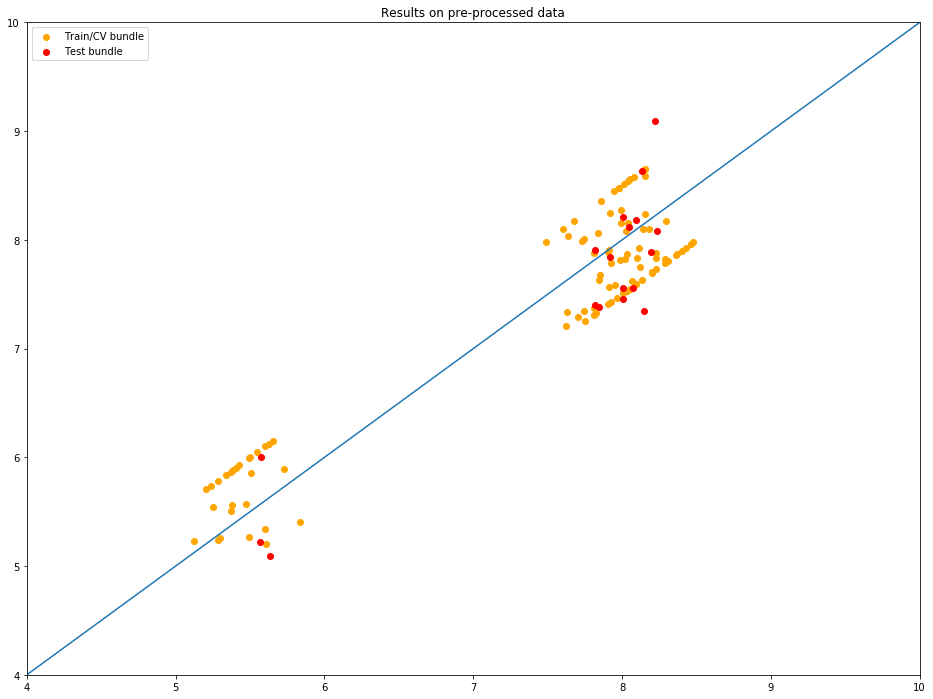

In [178]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import math
# Train best model
results = spectra2.trainModel(to_predict)
print(f"CV metrics: \nRMSECV = {round(math.sqrt(abs(mean_squared_error(results['Y_train'], results['Y_train_pred']))), 2)} \nR2 = {round(r2_score(results['Y_train'], results['Y_train_pred']), 2)}\n")
print(f"Test metrics: \nRMSEP = {round(math.sqrt(abs(mean_squared_error(results['Y_test'], results['Y_test_pred']))), 2)} \nR2 = {round(r2_score(results['Y_test'], results['Y_test_pred']), 2)}")
ax = plt.figure(figsize=(16,12))
plt.scatter(results["Y_train"], results["Y_train_pred"], color="orange", label="Train/CV bundle")
plt.scatter(results["Y_test"], results["Y_test_pred"], color="red", label="Test bundle")
plt.plot(np.arange(4.0, 10.1, 0.1),np.arange(4.0, 10.1, 0.1))
axes = plt.gca()
axes.set_xlim([4,10])
axes.set_ylim([4,10])
plt.legend()
plt.title("Results on pre-processed data")
plt.show()

In [133]:
spectra2._model

In [59]:
from sklearn.svm import SVR
from copy import copy
other_model = copy(spectra2._model[1])

CV metrics: 
RMSECV = 0.23 
R2 = 0.96

Test metrics: 
RMSEP = 0.31 
R2 = 0.89


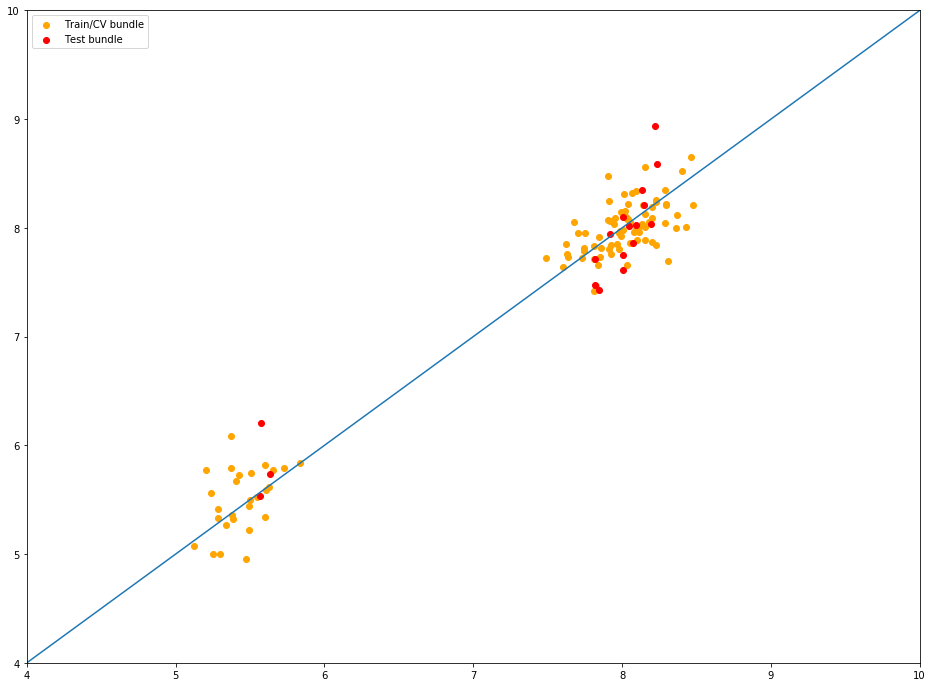

In [22]:
spectra2.loadModel("models/16-04-2020-0929.pkl")
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import math
# Train best model
results = spectra2.trainModel(to_predict)
print(f"CV metrics: \nRMSECV = {round(math.sqrt(abs(mean_squared_error(results['Y_train'], results['Y_train_pred']))), 2)} \nR2 = {round(r2_score(results['Y_train'], results['Y_train_pred']), 2)}\n")
print(f"Test metrics: \nRMSEP = {round(math.sqrt(abs(mean_squared_error(results['Y_test'], results['Y_test_pred']))), 2)} \nR2 = {round(r2_score(results['Y_test'], results['Y_test_pred']), 2)}")
ax = plt.figure(figsize=(16,12))
plt.scatter(results["Y_train"], results["Y_train_pred"], color="orange", label="Train/CV bundle")
plt.scatter(results["Y_test"], results["Y_test_pred"], color="red", label="Test bundle")
plt.plot(np.arange(4.0, 10.1, 0.1),np.arange(4.0, 10.1, 0.1))
axes = plt.gca()
axes.set_xlim([4,10])
axes.set_ylim([4,10])
plt.legend()
plt.show()

In [23]:
spectra2._model

(-0.45849241460448176,
 PLSReg(algorithm='svd', copy=True, max_iter=500, mode='A', n_components=10,
        scale=False, tol=1e-06),
 {'name': 'PLS', 'n_comp': None})

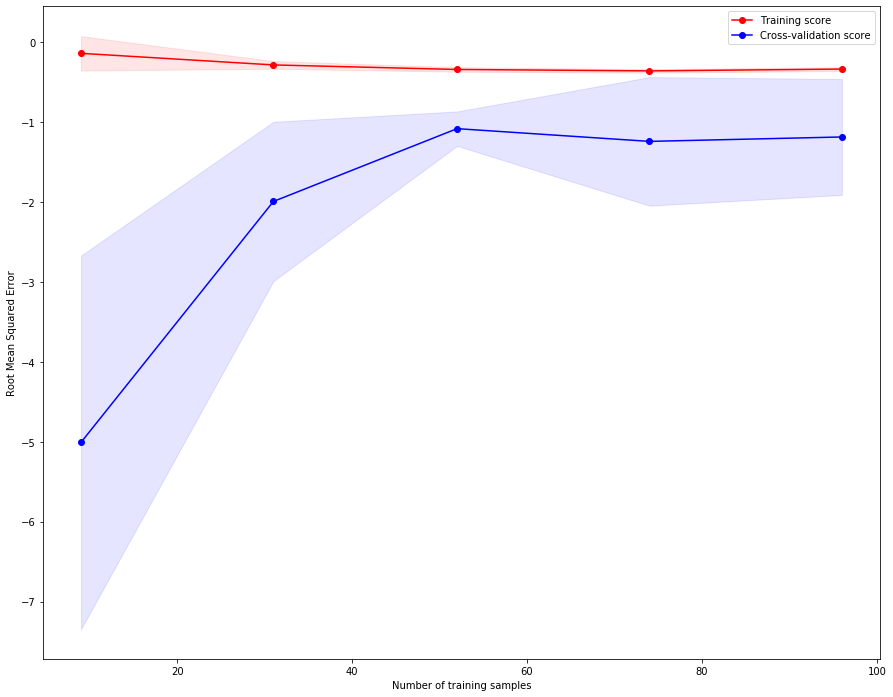

In [5]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(spectra2._model[1], np.stack(spectra2.loc[:, "intensity"]), to_predict, cv=5, scoring="neg_mean_squared_error")
plt.figure(figsize=(15,12))
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="b")
plt.plot(train_sizes, train_scores_mean, "o-", color="red", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="blue", label="Cross-validation score")
plt.xlabel("Number of training samples")
plt.ylabel("Root Mean Squared Error")
plt.legend()
plt.show()

In [13]:
abs(mean_squared_error(results['Y_train'], results['Y_train_pred']))

0.36063579999106316

In [157]:
spectra3 = rpy.Spectra()
to_predict_types = rpy.readFile("measurements/Ramandata_tablets.MAT", spectra3, True)

+----------------+------+----------+----------+----------+-----+----------+----------+----------+----------+----------+
| active (% w/w) | Type | 3600.000 | 3599.000 | 3598.000 | ... | 204.0000 | 203.0000 | 202.0000 | 201.0000 | 200.0000 |
+----------------+------+----------+----------+----------+-----+----------+----------+----------+----------+----------+
+----------------+------+----------+----------+----------+-----+----------+----------+----------+----------+----------+
Beginning of importing frequency: 3600.000
End of importing frequency: 200.0000
Name of column containing the to-predict values: Type


In [221]:
# Test all classifiers to obtain best one
spectra3.testClassifiers(to_predict_types)

Performing normalization...
Shapes (120, 3400) (120, 3400) (120, 3400) (120, 3400)
Performing dimensionality reduction...
Creating classifiers...
Testing classifiers...
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.
Evaluating...
Done evaluating.


CV metrics: 
Accuracy = 1.0
Test metrics: 
Accuracy = 0.83


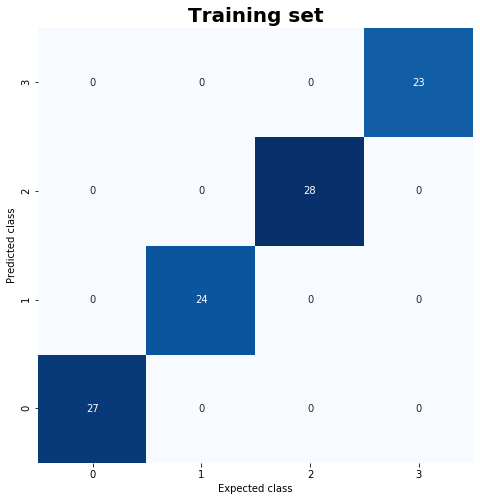

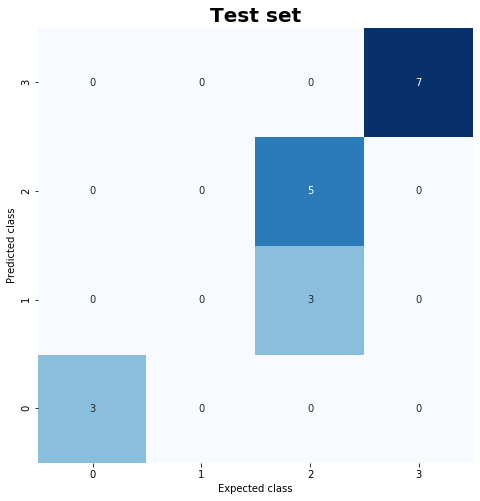

In [225]:
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
# Train best model
results = spectra3.trainModel(to_predict_types)
print(f"CV metrics: \nAccuracy = {round(accuracy_score(results['Y_train'], results['Y_train_pred']), 2)}")
print(f"Test metrics: \nAccuracy = {round(accuracy_score(results['Y_test'], results['Y_test_pred']), 2)}")
plt.figure(figsize=(8,8))
ax = sb.heatmap(confusion_matrix(results['Y_train'], results['Y_train_pred']), annot=True, square=True, cbar=False, cmap="Blues")
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_title("Training set", fontsize=20, fontweight="bold")
ax.set_xlabel("Expected class")
ax.set_ylabel("Predicted class")
plt.show()
plt.figure(figsize=(8,8))
ax = sb.heatmap(confusion_matrix(results['Y_test'], results['Y_test_pred']), annot=True, square=True, cbar=False, cmap="Blues")
ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_title("Test set", fontsize=20, fontweight="bold")
ax.set_xlabel("Expected class")
ax.set_ylabel("Predicted class")
plt.show()